<a href="https://colab.research.google.com/github/PreYarnShoe/SkyHack-2.0/blob/main/SkyHack_2_0_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
calls = pd.read_csv('/content/drive/MyDrive/Skyhack/callsf0d4f5a.csv')
customers = pd.read_csv('/content/drive/MyDrive/Skyhack/customers2afd6ea.csv')
sentiment = pd.read_csv('/content/drive/MyDrive/Skyhack/sentiment_statisticscc1e57a.csv')
reason = pd.read_csv('/content/drive/MyDrive/Skyhack/reason18315ff.csv')

In [32]:
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'], format='%m/%d/%Y %H:%M')
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'], format='%m/%d/%Y %H:%M')

In [33]:
calls['total_call_time'] = (calls['call_end_datetime'] - calls['call_start_datetime']).dt.total_seconds()
calls['time_waited'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds()
calls['time_to_resolve'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds()

# **Calculating AHT and AST**

In [35]:
total_calls = calls.shape[0]
total_handle_time = calls['total_call_time'].sum()
total_waiting_time = calls['time_waited'].sum()

AHT = total_handle_time / total_calls
AST = total_waiting_time / total_calls
print('Overall AHT = ',AHT)
print('Overall AST = ',AST)

Overall AHT =  1134.1161398133966
Overall AST =  437.0675393399248


merging calls dataset with customers dataset

In [36]:
calls_with_customer = pd.merge(calls, customers, on='customer_id', how='left')

merging calls_with_customer to sentiment dataset

In [37]:
call_sentiment = pd.merge(calls_with_customer, sentiment, on='call_id', how='left')

In [38]:
call_sentiment.drop('agent_id_y', axis=1, inplace=True)
call_sentiment.rename(columns={'agent_id_x': 'agent_id'}, inplace=True)

## **Important Data**

In [39]:
imp_data = call_sentiment[['call_id', 'customer_id', 'agent_id', 'elite_level_code', 'total_call_time', 'time_waited', 'time_to_resolve', 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average']]

#### Merging reasons

In [40]:
imp_data = pd.merge(imp_data, reason, on='call_id', how='left')

In [41]:
imp_data['primary_call_reason'].fillna('Other Topics', inplace=True)
imp_data['total_call_time'] = pd.to_numeric(imp_data['total_call_time'], errors='coerce')
imp_data['time_waited'] = pd.to_numeric(imp_data['time_waited'], errors='coerce')
imp_data['time_to_resolve'] = pd.to_numeric(imp_data['time_to_resolve'], errors='coerce')

<ipython-input-41-5c58a6285280>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





cleaning reasons data

In [42]:
imp_data['primary_call_reason'] = imp_data['primary_call_reason'].str.strip().str.lower()
imp_data['primary_call_reason'] = imp_data['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)
standard_reasons = {
    'products & services': 'products and services',
    'post flight': 'post-flight',
    'check in': 'check-in',
    'mileage plus': 'mileage plus',
    'digital support': 'digital support',
    'voluntary change': 'voluntary change',
    'voluntary cancel': 'voluntary cancel',
    'traveler updates': 'traveler updates',
    'other topics': 'other topics',
    'irrops': 'irrops',
    'seating': 'seating',
    'unaccompanied minor': 'unaccompanied minor',
    'schedule change': 'schedule change',
    'baggage': 'baggage',
    'communications': 'communications',
    'booking': 'booking',
    'etc': 'etc',
    'disability': 'disability',
}

imp_data['primary_call_reason'] = imp_data['primary_call_reason'].replace(standard_reasons)

In [43]:
imp_data

,call_id,customer_id,agent_id,elite_level_code,total_call_time,time_waited,time_to_resolve,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,4.0,2280.0,420.0,1860.0,neutral,angry,-0.04,0.39,voluntary cancel
1,1122072124,8186702651,519057,NaN,900.0,180.0,720.0,calm,neutral,0.02,0.35,booking
2,6834291559,2416856629,158319,NaN,1620.0,480.0,1140.0,neutral,polite,-0.13,0.32,irrops
3,2266439882,1154544516,488324,2.0,720.0,300.0,420.0,neutral,frustrated,-0.20,0.20,upgrade
4,1211603231,5214456437,721730,0.0,1140.0,600.0,540.0,neutral,polite,-0.05,0.35,seating
...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,NaN,2220.0,540.0,1680.0,calm,calm,0.05,0.34,post-flight
71806,8865997781,4474867021,980156,1.0,660.0,180.0,480.0,calm,frustrated,0.03,0.22,upgrade
71807,8019240181,9762042472,616988,NaN,720.0,360.0,360.0,calm,polite,0.05,0.42,upgrade
71808,8332067080,8095620266,161354,1.0,600.0,360.0,240.0,neutral,polite,-0.07,0.13,other topics


In [44]:
pivot_data = imp_data.pivot_table(index='agent_tone', columns='customer_tone', values='time_to_resolve', aggfunc='mean').astype(int)

fig = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='Blues',
    text=pivot_data.values,
    hoverinfo='text',
    showscale=True,
    texttemplate="%{text}",
))

fig.update_layout(
    title="Time to Resolve by Agent and Customer Tone",
    xaxis_title="Customer Tone",
    yaxis_title="Agent Tone",
    width=800,
    height=800,
)

fig.show()


In [54]:
pivot_data = imp_data.pivot_table(index='agent_tone', columns='customer_tone', values='total_call_time', aggfunc='mean').astype(int)

fig = go.Figure(data=go.Heatmap(
    z=pivot_data.values,
    x=pivot_data.columns,
    y=pivot_data.index,
    colorscale='Blues',
    text=pivot_data.values,
    hoverinfo='text',
    showscale=True,
    texttemplate="%{text}",
))

fig.update_layout(
    title="Total Call Time by Agent and Customer Tone",
    xaxis_title="Customer Tone",
    yaxis_title="Agent Tone",
    width=800,
    height=800,
)

fig.show()


<Axes: xlabel='average_sentiment', ylabel='time_to_resolve'>

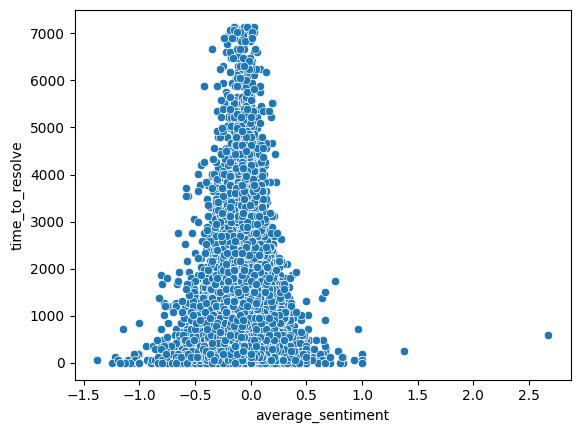

In [55]:
sns.scatterplot(data=imp_data, x='average_sentiment', y='time_to_resolve')

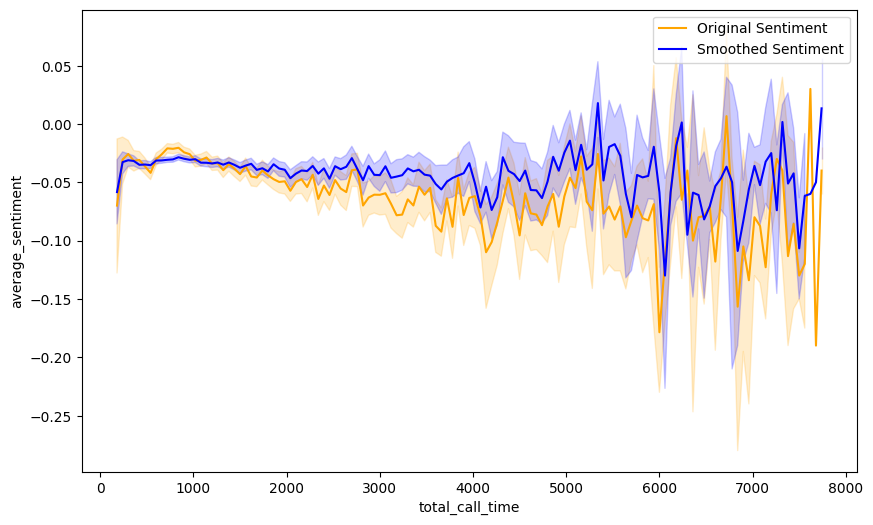

In [56]:
imp_data['moving_avg_sentiment'] = imp_data['average_sentiment'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))

sns.lineplot(x='total_call_time', y='average_sentiment', data=imp_data, label='Original Sentiment', color='orange')
sns.lineplot(x='total_call_time', y='moving_avg_sentiment', data=imp_data, label='Smoothed Sentiment', color='blue')
plt.legend()
plt.show()

#Reason Analysis

In [45]:
reason_count = imp_data['primary_call_reason'].value_counts()
reason_time = imp_data.groupby('primary_call_reason').mean(numeric_only=True)[['total_call_time', 'time_waited', 'time_to_resolve','silence_percent_average']].reset_index()

In [46]:
reason_time = pd.merge(reason_time, reason_count, on='primary_call_reason', how='left')

In [47]:
reason_time.sort_values(by='count', ascending=False, inplace=True)

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=reason_time['primary_call_reason'], y=reason_time['total_call_time'],
           name='Total Call Time', opacity=0.7),
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=reason_time['primary_call_reason'], y=reason_time['count'],
               mode='lines+markers', name='Number of Calls',
               line=dict(color='orange')),
    secondary_y=True)

fig.update_layout(
    title='Total Call Time and Number of Calls by Call Reason',
    xaxis_title='Call Reason',
    yaxis_title='Total Call Time',
    width=1280,
    height=400)


fig.update_yaxes(title_text='Number of Calls', secondary_y=True)
fig.update_xaxes(tickangle=45)
fig.show()


In [49]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=reason_time['primary_call_reason'], y=reason_time['total_call_time'],
           name='Total Call Time', opacity=0.7),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=reason_time['primary_call_reason'], y=reason_time['silence_percent_average'],
               mode='lines+markers', name='Silence Percent',
               line=dict(color='orange')),
    secondary_y=True,
)

fig.update_layout(
    title='Total Call Time and Silence percent by Call Reason',
    xaxis_title='Call Reason',
    yaxis_title='Total Call Time',
    width=800,
    height=400,
)

fig.update_yaxes(title_text='Silence Percent', secondary_y=True)

fig.update_xaxes(tickangle=45)

fig.show()


In [50]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(x=reason_time['primary_call_reason'], y=reason_time['time_waited'],
           name='Call Wait Time', opacity=0.7),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=reason_time['primary_call_reason'], y=reason_time['count'],
               mode='lines+markers', name='Number of Calls',
               line=dict(color='orange')),
    secondary_y=True,
)

fig.update_layout(
    title='Call Wait Time and Number of Calls by Call Reason',
    xaxis_title='Call Reason',
    yaxis_title='Call Wait Time',
    width=1280,
    height=400,
)

fig.update_yaxes(title_text='Number of Calls', secondary_y=True)

fig.update_xaxes(tickangle=45)

fig.show()


In [87]:
fig = px.pie(reason_time, values='count', names='primary_call_reason', title='Call Reasons')
fig.update_layout(
    width=500,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20) )
fig.show()

## Percent difference in most and least frequent call reasons

In [51]:
#IRROPS
irrops_data = imp_data[imp_data['primary_call_reason'] == 'irrops']
irrops_calls = irrops_data.shape[0]
total_irrops_time = irrops_data['total_call_time'].sum()
irrops_aht = total_irrops_time / irrops_calls
irrops_aht

1145.1972053189093

In [52]:
#unaccopained_minor
unaccopained_minor_data = imp_data[imp_data['primary_call_reason'] == 'unaccompanied minor']
unaccopained_minor_calls = unaccopained_minor_data.shape[0]
total_unaccopained_minor_time = unaccopained_minor_data['total_call_time'].sum()
unaccopained_minor_aht = total_unaccopained_minor_time / unaccopained_minor_calls
unaccopained_minor_aht

1207.5

In [53]:
#aht percent difference between most and least frequent call reasons
aht_diff = (unaccopained_minor_aht - irrops_aht) / irrops_aht * 100
aht_diff

5.440355110169951

#Silence Time

In [57]:
imp_data['silence_percent_average'] = pd.to_numeric(imp_data['silence_percent_average'], errors='coerce')

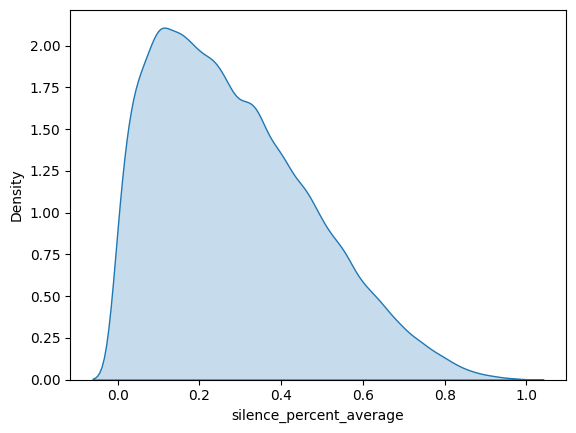

In [58]:
sns.kdeplot(imp_data['silence_percent_average'], fill=True)
plt.show()

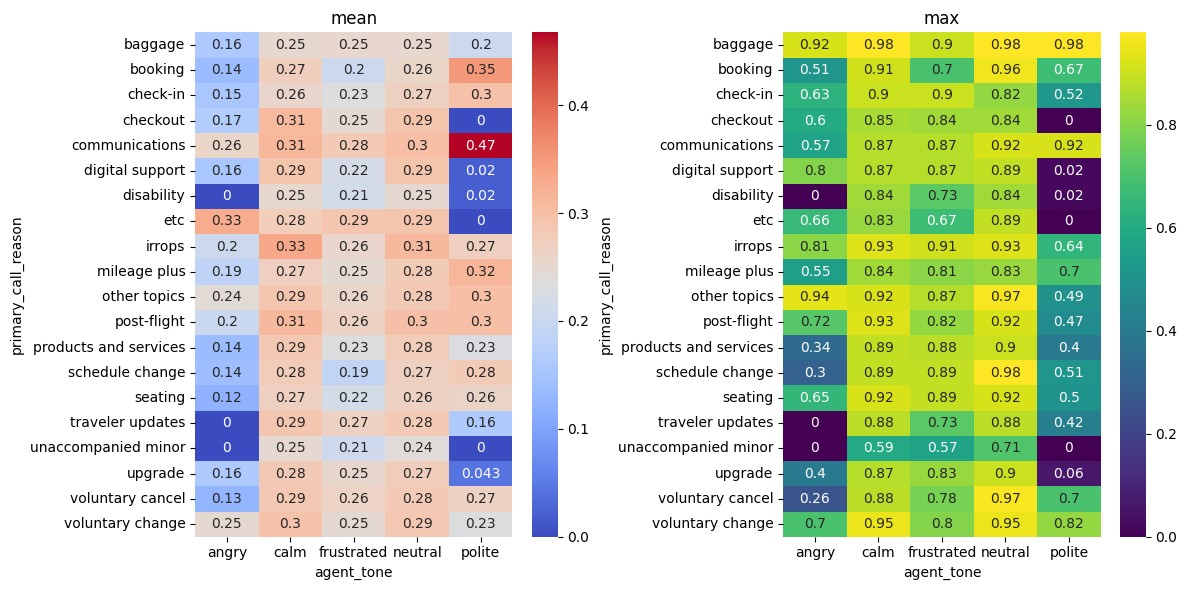

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(imp_data.pivot_table(index='primary_call_reason', columns='agent_tone', values='silence_percent_average', aggfunc='mean', fill_value=0), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('mean')
sns.heatmap(imp_data.pivot_table(index='primary_call_reason', columns='agent_tone', values='silence_percent_average', aggfunc='max', fill_value=0), annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('max')
plt.tight_layout()
plt.show()

<Axes: xlabel='time_to_resolve', ylabel='silence_percent_average'>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



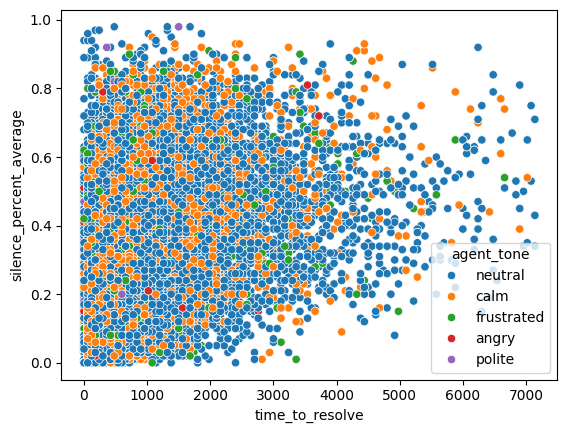

In [60]:
sns.scatterplot(data=imp_data, x='time_to_resolve', y='silence_percent_average', hue='agent_tone')

#Agents

creating agents data

In [65]:
agent_data = imp_data.groupby('agent_id').mean(numeric_only=True)[['total_call_time', 'time_waited', 'time_to_resolve','silence_percent_average']].sort_values(by='total_call_time', ascending=False)
agent_freq = imp_data.groupby('agent_id')['primary_call_reason'] .agg(lambda x: x.value_counts().idxmax())
agent_aht_ast = imp_data.groupby('agent_id').agg({'total_call_time':'sum', 'time_waited':'sum', 'time_to_resolve':'count'})

In [66]:
agent_data = pd.merge(agent_data, agent_freq, on='agent_id', how='left')
agent_data = pd.merge(agent_data, agent_aht_ast, on='agent_id', how='left')

agent_data['AHT'] = agent_data['total_call_time_y'] / agent_data['time_to_resolve_y']
agent_data['AST'] = agent_data['time_waited_y'] / agent_data['time_to_resolve_y']

agent_data.drop(['total_call_time_y', 'time_waited_y', 'time_to_resolve_y'], axis=1, inplace=True)

In [67]:
agent_data.reset_index(inplace=True)
agent_data.reset_index(inplace=True)

In [68]:
agent_data

,index,agent_id,total_call_time_x,time_waited_x,time_to_resolve_x,silence_percent_average,primary_call_reason,AHT,AST
0,0,102574,4080.0,480.000000,3600.000000,0.260000,irrops,4080.0,480.000000
1,1,506130,3300.0,420.000000,2880.000000,0.390000,voluntary cancel,3300.0,420.000000
2,2,140146,2980.0,360.000000,2620.000000,0.420000,mileage plus,2980.0,360.000000
3,3,255256,2900.0,280.000000,2620.000000,0.443333,products and services,2900.0,280.000000
4,4,558705,2400.0,420.000000,1980.000000,0.180000,irrops,2400.0,420.000000
...,...,...,...,...,...,...,...,...,...
378,378,676262,840.0,450.000000,390.000000,0.186250,irrops,840.0,450.000000
379,379,161354,780.0,420.000000,360.000000,0.315000,baggage,780.0,420.000000
380,380,547592,780.0,600.000000,180.000000,0.100000,digital support,780.0,600.000000
381,381,229129,760.0,386.666667,373.333333,0.241111,communications,760.0,386.666667


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



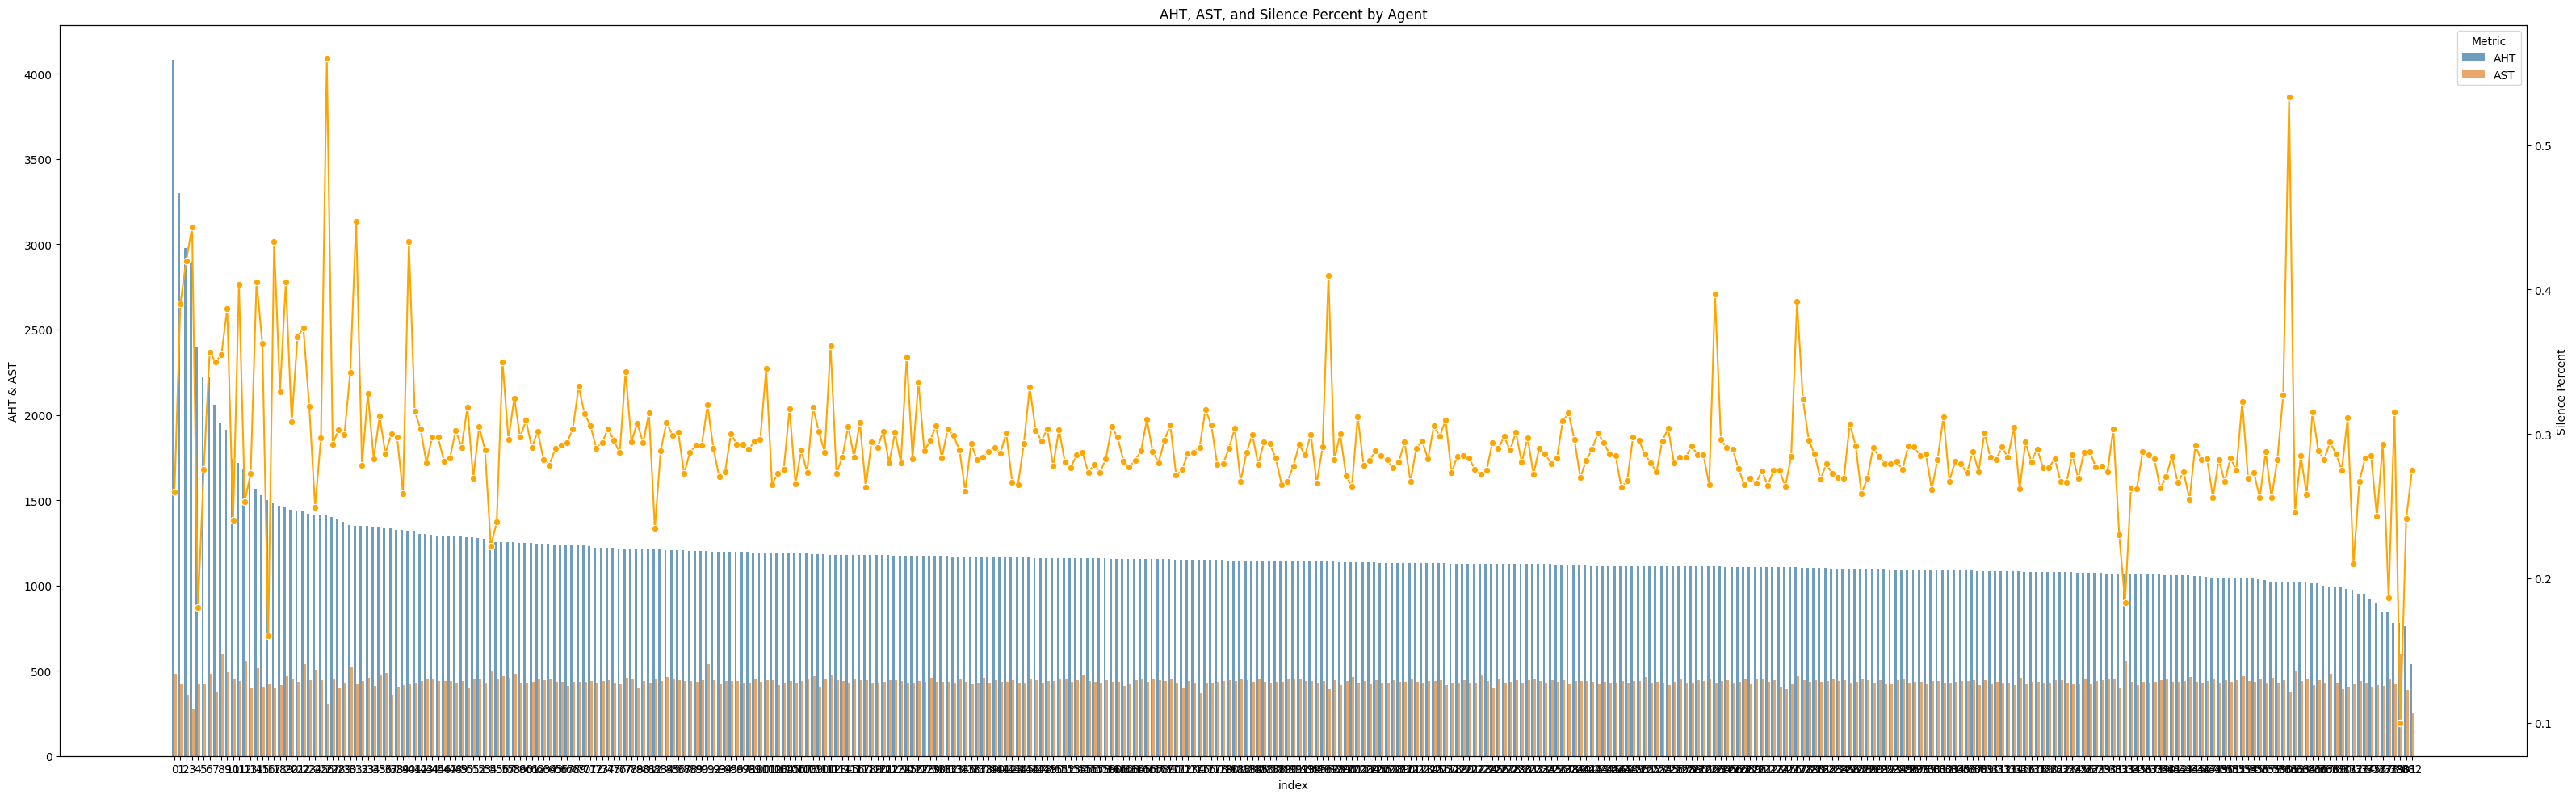

In [69]:
melted_data = agent_data.melt(id_vars=['index'], value_vars=['AHT', 'AST'],
                              var_name='Metric', value_name='Value')


plt.figure(figsize=(32, 10))
ax1 = sns.barplot(data=melted_data, x='index', y='Value', hue='Metric', alpha=0.7)

ax2 = plt.gca().twinx()
sns.lineplot(data=agent_data, x='index', y='silence_percent_average', marker='o', color='orange', ax=ax2)

plt.xlabel('Agent ID')
ax1.set_ylabel('AHT & AST')
ax2.set_ylabel('Silence Percent')

plt.xticks(rotation=45, ha='right')
plt.title('AHT, AST, and Silence Percent by Agent')
plt.tight_layout()
plt.show()

In [70]:
agent_aht_ast.drop(['total_call_time','time_waited'], axis=1, inplace=True)
agent_data = pd.merge(agent_data, agent_aht_ast, on='agent_id', how='left')
agent_data.rename(columns={'time_to_resolvc': 'count'}, inplace=True)
agent_data.rename(columns={'time_to_resolve': 'count'}, inplace=True)
agent_data

,index,agent_id,total_call_time_x,time_waited_x,time_to_resolve_x,silence_percent_average,primary_call_reason,AHT,AST,count
0,0,102574,4080.0,480.000000,3600.000000,0.260000,irrops,4080.0,480.000000,2
1,1,506130,3300.0,420.000000,2880.000000,0.390000,voluntary cancel,3300.0,420.000000,1
2,2,140146,2980.0,360.000000,2620.000000,0.420000,mileage plus,2980.0,360.000000,3
3,3,255256,2900.0,280.000000,2620.000000,0.443333,products and services,2900.0,280.000000,3
4,4,558705,2400.0,420.000000,1980.000000,0.180000,irrops,2400.0,420.000000,2
...,...,...,...,...,...,...,...,...,...,...
378,378,676262,840.0,450.000000,390.000000,0.186250,irrops,840.0,450.000000,8
379,379,161354,780.0,420.000000,360.000000,0.315000,baggage,780.0,420.000000,2
380,380,547592,780.0,600.000000,180.000000,0.100000,digital support,780.0,600.000000,1
381,381,229129,760.0,386.666667,373.333333,0.241111,communications,760.0,386.666667,9


In [71]:
agent_tone_freq = imp_data.groupby('agent_id')['agent_tone'] .agg(lambda x: x.value_counts().idxmax())
agent_data = agent_data.merge(agent_tone_freq, on='agent_id', how='left')
agent_sentiment = imp_data.groupby('agent_id').mean(numeric_only=True)[['average_sentiment']]
agent_data = agent_data.merge(agent_sentiment, on='agent_id', how='left')

Creating data with top 50 agents by calls picked and bottom 50 by calls picked

In [72]:
top_agent_data = pd.concat([agent_data.sort_values(by='count', ascending=False).head(50),agent_data.sort_values(by='count', ascending=False).tail(50)]).reset_index()
top_agent_data.drop('index', axis=1, inplace=True)
top_agent_data.reset_index(inplace=True)
top_agent_data

,index,level_0,agent_id,total_call_time_x,time_waited_x,time_to_resolve_x,silence_percent_average,primary_call_reason,AHT,AST,count,agent_tone,average_sentiment
0,0,338,251287,1064.320988,436.543210,627.777778,0.282778,irrops,1064.320988,436.543210,486,neutral,-0.036543
1,1,334,594957,1069.272349,436.340956,632.931393,0.262599,irrops,1069.272349,436.340956,481,neutral,-0.048938
2,2,305,963118,1088.280255,438.471338,649.808917,0.279427,irrops,1088.280255,438.471338,471,neutral,-0.050149
3,3,298,757349,1092.913043,432.652174,660.260870,0.284870,irrops,1092.913043,432.652174,460,neutral,-0.031978
4,4,339,376343,1062.610619,444.292035,618.318584,0.262323,irrops,1062.610619,444.292035,452,neutral,-0.029268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,26,980156,1410.000000,300.000000,1110.000000,0.560000,products and services,1410.000000,300.000000,2,neutral,0.015000
96,96,91,771538,1200.000000,540.000000,660.000000,0.320000,voluntary change,1200.000000,540.000000,2,neutral,-0.085000
97,97,0,102574,4080.000000,480.000000,3600.000000,0.260000,irrops,4080.000000,480.000000,2,neutral,-0.075000
98,98,1,506130,3300.000000,420.000000,2880.000000,0.390000,voluntary cancel,3300.000000,420.000000,1,neutral,-0.030000


<Axes: xlabel='index', ylabel='AHT'>

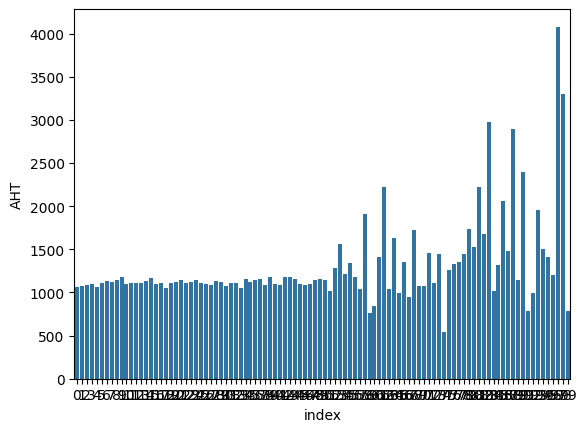

In [73]:
sns.barplot(data=top_agent_data, x='index', y='AHT')

In [74]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=top_agent_data['index'][:50],
    y=top_agent_data['average_sentiment'][:50],
    mode='lines+markers',
    name='Top 50 Agents',
    line=dict(color='blue'),
    marker=dict(symbol='circle', size=8)))

fig.add_trace(go.Scatter(
    x=top_agent_data['index'][-50:],
    y=top_agent_data['average_sentiment'][-50:],
    mode='lines+markers',
    name='Least 50 Agents',
    line=dict(color='orange'),
    marker=dict(symbol='circle', size=8)))
fig.update_layout(
    title='Graph Depicting Average Sentiment of Top 50 Agents with Most Calls Received and Least 50 Agents',
    xaxis_title='Agents',
    yaxis_title='Average Sentiment',
    width=700,
    height=400)
fig.show()

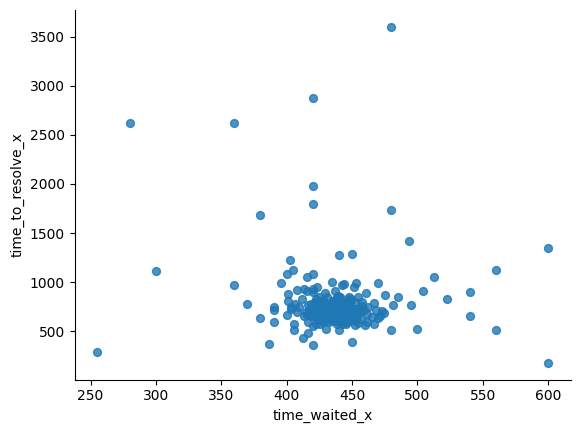

In [76]:
from matplotlib import pyplot as plt
sorted_agent_data = agent_data.sort_values(by='count', ascending=False)
sorted_agent_data.plot(kind='scatter', x='time_waited_x', y='time_to_resolve_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [78]:
sorted_agent_data

,index,agent_id,total_call_time_x,time_waited_x,time_to_resolve_x,silence_percent_average,primary_call_reason,AHT,AST,count,agent_tone,average_sentiment,calls_bins
338,338,251287,1064.320988,436.543210,627.777778,0.282778,irrops,1064.320988,436.543210,486,neutral,-0.036543,"(485, 490]"
334,334,594957,1069.272349,436.340956,632.931393,0.262599,irrops,1069.272349,436.340956,481,neutral,-0.048938,"(480, 485]"
305,305,963118,1088.280255,438.471338,649.808917,0.279427,irrops,1088.280255,438.471338,471,neutral,-0.050149,"(470, 475]"
298,298,757349,1092.913043,432.652174,660.260870,0.284870,irrops,1092.913043,432.652174,460,neutral,-0.031978,"(455, 460]"
339,339,376343,1062.610619,444.292035,618.318584,0.262323,irrops,1062.610619,444.292035,452,neutral,-0.029268,"(450, 455]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,980156,1410.000000,300.000000,1110.000000,0.560000,products and services,1410.000000,300.000000,2,neutral,0.015000,"(0, 5]"
91,91,771538,1200.000000,540.000000,660.000000,0.320000,voluntary change,1200.000000,540.000000,2,neutral,-0.085000,"(0, 5]"
0,0,102574,4080.000000,480.000000,3600.000000,0.260000,irrops,4080.000000,480.000000,2,neutral,-0.075000,"(0, 5]"
1,1,506130,3300.000000,420.000000,2880.000000,0.390000,voluntary cancel,3300.000000,420.000000,1,neutral,-0.030000,"(0, 5]"


In [80]:
bins = range(0, sorted_agent_data['count'].max() + 5, 5)
sorted_agent_data['calls_bins'] = pd.cut(sorted_agent_data['count'], bins=bins)

sorted_agent_data['calls_bins'] = sorted_agent_data['calls_bins'].astype(str)

hist_data = sorted_agent_data['calls_bins'].value_counts().sort_index().reset_index()
hist_data.columns = ['calls_bins', 'num_agents']

fig = px.bar(
    hist_data,
    x='calls_bins',
    y='num_agents',
    title='Distribution of Agents by Number of Calls Picked',
    labels={'calls_bins': 'Number of Calls Picked (in blocks of 5)', 'num_agents': 'Number of Agents'},
    opacity=0.7)

fig.update_layout(
    xaxis_title='Number of Calls Picked (in blocks of 5)',
    yaxis_title='Number of Agents',
    xaxis=dict(tickangle=45),
    width=1000,
    height=400)
fig.show()

#Time Analysis

In [81]:
time_data = calls[['call_id','agent_id', 'customer_id', 'call_start_datetime','agent_assigned_datetime']]

time_data = pd.merge(time_data, sentiment, on='call_id', how='left')
time_data = pd.merge(time_data, reason, on='call_id', how='left')

time_data['call_start_datetime'] = pd.to_datetime(time_data['call_start_datetime'], format='%m/%d/%Y %H:%M')
time_data['agent_assigned_datetime'] = pd.to_datetime(time_data['agent_assigned_datetime'], format='%m/%d/%Y %H:%M')

time_data['call_in_time'] = time_data['call_start_datetime'].dt.strftime('%H:%M')
time_data['agent_pick_time'] = time_data['agent_assigned_datetime'].dt.strftime('%H:%M')
time_data

,call_id,agent_id_x,customer_id,call_start_datetime,agent_assigned_datetime,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,call_in_time,agent_pick_time
0,4667960400,963118,2033123310,2024-07-31 23:56:00,2024-08-01 00:03:00,963118,neutral,angry,-0.04,0.39,Voluntary Cancel,23:56,00:03
1,1122072124,519057,8186702651,2024-08-01 00:03:00,2024-08-01 00:06:00,519057,calm,neutral,0.02,0.35,Booking,00:03,00:06
2,6834291559,158319,2416856629,2024-07-31 23:59:00,2024-08-01 00:07:00,158319,neutral,polite,-0.13,0.32,IRROPS,23:59,00:07
3,2266439882,488324,1154544516,2024-08-01 00:05:00,2024-08-01 00:10:00,488324,neutral,frustrated,-0.20,0.20,Upgrade,00:05,00:10
4,1211603231,721730,5214456437,2024-08-01 00:04:00,2024-08-01 00:14:00,721730,neutral,polite,-0.05,0.35,Seating,00:04,00:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,413148,8022667294,2024-08-31 23:48:00,2024-08-31 23:57:00,413148,calm,calm,0.05,0.34,Post Flight,23:48,23:57
71806,8865997781,980156,4474867021,2024-08-31 23:55:00,2024-08-31 23:58:00,980156,calm,frustrated,0.03,0.22,Upgrade,23:55,23:58
71807,8019240181,616988,9762042472,2024-08-31 23:52:00,2024-08-31 23:58:00,616988,calm,polite,0.05,0.42,Upgrade,23:52,23:58
71808,8332067080,161354,8095620266,2024-08-31 23:53:00,2024-08-31 23:59:00,161354,neutral,polite,-0.07,0.13,NaN,23:53,23:59


In [82]:
time_data['primary_call_reason'].fillna('Other Topics', inplace=True)
time_data['primary_call_reason'] = imp_data['primary_call_reason'].str.strip().str.lower()
time_data['primary_call_reason'] = imp_data['primary_call_reason'].str.replace(r'\s+', ' ', regex=True)

time_data['primary_call_reason'] = imp_data['primary_call_reason'].replace(standard_reasons)

<ipython-input-82-4489d875f20e>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





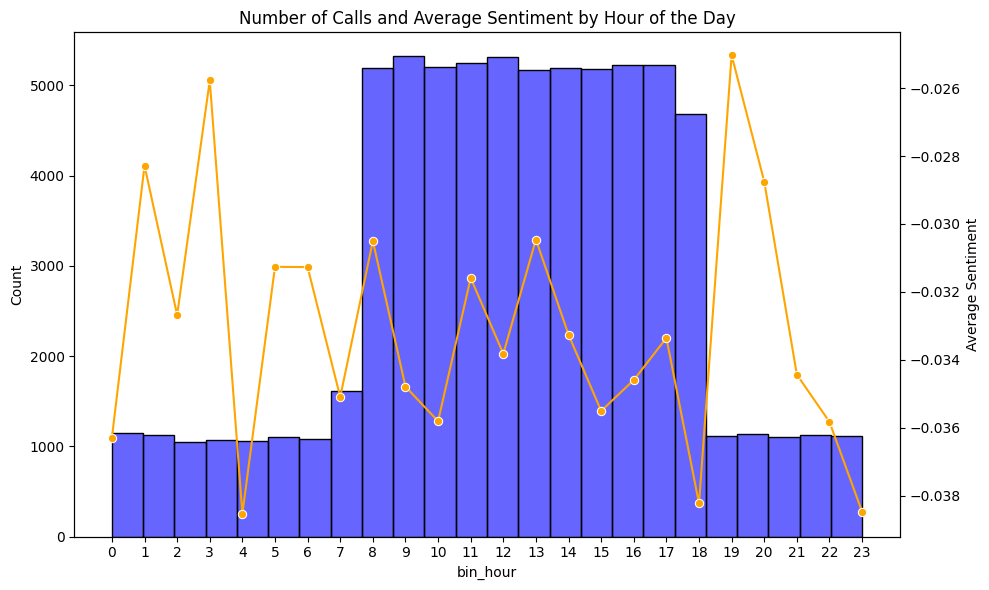

In [83]:
time_data['bin_hour'] = time_data['call_start_datetime'].dt.hour

avg_sentiment_by_hour = time_data.groupby('bin_hour')['average_sentiment'].mean()

plt.figure(figsize=(10, 6))

sns.histplot(time_data['bin_hour'], bins=24, kde=False, color='blue', alpha=0.6)

ax2 = plt.gca().twinx()

sns.lineplot(x=avg_sentiment_by_hour.index, y=avg_sentiment_by_hour.values, color='orange', marker='o', ax=ax2)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
ax2.set_ylabel('Average Sentiment')
plt.title('Number of Calls and Average Sentiment by Hour of the Day')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

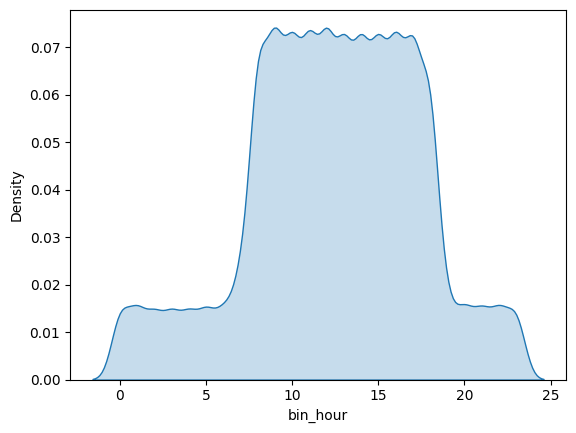

In [84]:
sns.kdeplot(time_data['bin_hour'], fill=True)
plt.show()

In [85]:
call_counts = time_data.groupby(['bin_hour', 'primary_call_reason']).size().reset_index(name='call_count')

heatmap_data = call_counts.pivot(index='primary_call_reason', columns='bin_hour', values='call_count').fillna(0)

fig = px.imshow(heatmap_data.values,
                labels=dict(x='Hour of the Day', y='Primary Call Reason', color='Number of Calls'),
                x=heatmap_data.columns,
                y=heatmap_data.index,
                color_continuous_scale='YlGnBu',
                text_auto=True)

fig.update_layout(title='Number of Calls by Primary Call Reason and Hour of the Day',
                  xaxis_title='Hour of the Day',
                  yaxis_title='Primary Call Reason',
                  xaxis=dict(tickmode='linear'),
                  yaxis=dict(autorange='reversed'),
                  width=1000)
fig.show()